# HW7 Notebook

Name: **Tony Nguyen**

Class: CPSC 322 01

Term: Fall 2023

## 1. Load Libraries

 Import the various data and utility functions.

In [1]:
from decision_tree import *
from data_table import *
from data_learn import *
from data_eval import *
from data_util import *

## 2. Creating and Drawing Decision Trees

TODO: Create and draw **two** different and interesting decision trees (i.e., with a couple of attributes, multiple values, and multiple leaf nodes). You should create your decision trees directly using the decision tree classes (AttributeNode and LeafNode). Note that to draw the trees, use the draw_tree function with the display flag set to False. The result of the draw tree function can then be displayed inline in the notebook. For example:
 ```python
 diagram = draw_tree(root, 'tmp-1.dot', False)
 diagram
```

### 2.1 Decision Tree 1

In [2]:
subtree_a = AttributeNode('A', {1: [LeafNode('Yes', 10, 20)],
                                2: [LeafNode('No', 30, 40)]})

subtree_b = AttributeNode('B', {True: [LeafNode('Yes', 5, 10)],
                                False: [LeafNode('No', 15, 20)]})

root1 = AttributeNode('Root', {'Feature_A': subtree_a,
                              'Feature_B': subtree_b})

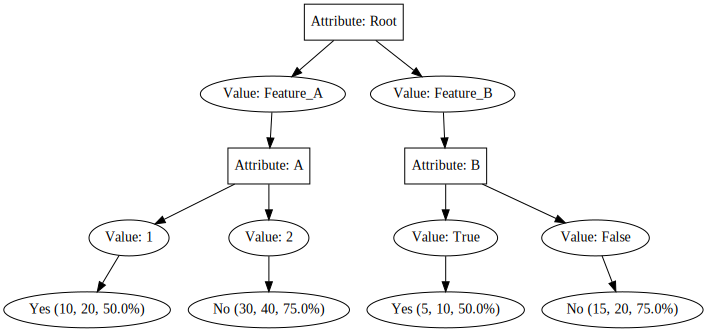

In [3]:
diagram1 = draw_tree(root1, 'diagram1.dot', display=False)
diagram1

### 2.2 Decision Tree 2

In [4]:
subtree_a = AttributeNode('A', {1: [LeafNode('Yes', 10, 20)],
                                2: [LeafNode('No', 30, 40)]})

subtree_b = AttributeNode('B', {True: [LeafNode('Yes', 5, 10)],
                                False: [LeafNode('No', 15, 20)]})

subtree_c = AttributeNode('C', {'X': [LeafNode('Yes', 7, 15)],
                                'Y': [LeafNode('Yes', 8, 15)]})

subtree_d = AttributeNode('D', {3.14: [LeafNode('Yes', 2, 5)],
                                2.71: [LeafNode('No', 3, 5)]})

root2 = AttributeNode('Root', {'Feature_A': subtree_a,
                              'Feature_B': subtree_b,
                              'Feature_C': subtree_c,
                              'Feature_D': subtree_d})

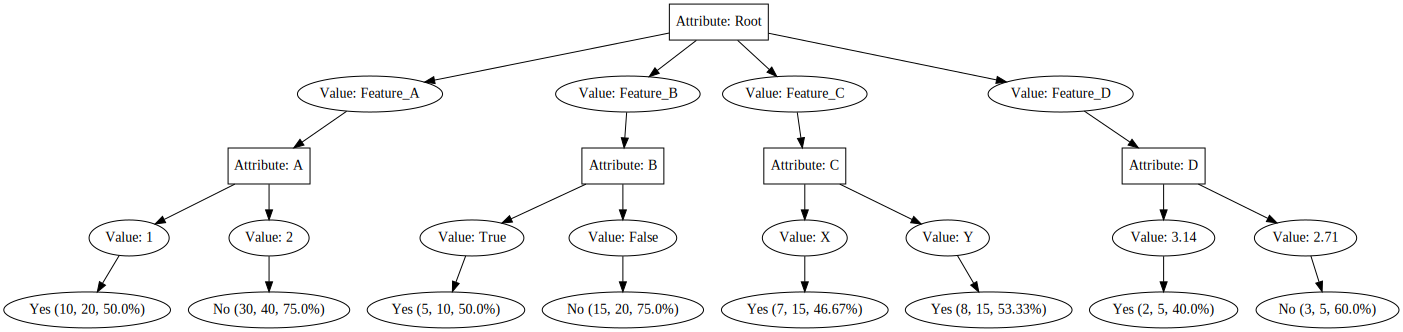

In [5]:
diagram2 = draw_tree(root2, 'diagram2.dot', display=False)
diagram2

## 3. Auto MPG Data Analysis

### 3.1 Load and clean auto data. Create Initial Decision Trees 
#### 3.1.1 Load auto data

In [6]:
auto = DataTable(['mpg','cyls','disp','hp','weight','accl','year','origin','name'])
auto.load('auto-mpg.txt')
auto.rows(range(10))

#TODO: Clean the auto data by:
#  1. removing all duplicate rows
#  2. removing all rows with missing values in any of the columns
#  Note: these two steps should be carried out with functions we've already defined

  mpg    cyls    disp    hp    weight    accl    year    origin  name
-----  ------  ------  ----  --------  ------  ------  --------  -------------------------
   18       8     307   130      3504    12        70         1  chevrolet chevelle malibu
   15       8     350   165      3693    11.5      70         1  buick skylark 320
   18       8     318   150      3436    11        70         1  plymouth satellite
   16       8     304   150      3433    12        70         1  amc rebel sst
   17       8     302   140      3449    10.5      70         1  ford torino
   15       8     429   198      4341    10        70         1  ford galaxie 500
   14       8     454   220      4354     9        70         1  chevrolet impala
   14       8     440   215      4312     8.5      70         1  plymouth fury iii
   14       8     455   225      4425    10        70         1  pontiac catalina
   15       8     390   190      3850     8.5      70         1  amc ambassador dpl

#### 3.1.2 Clean auto data

In [7]:
print("Number of rows before cleaning:", auto.row_count())

Number of rows before cleaning: 317


#### 3.1.3 Remove duplicate rows

In [8]:
auto = remove_duplicates(auto)
print("Number of rows after removing duplicated rows:", auto.row_count())

Number of rows after removing duplicated rows: 316


#### 3.1.4 Remove rows with missing values

In [9]:
auto = remove_missing(auto, auto.columns())
print("Number of rows after removing missing values:", auto.row_count())

Number of rows after removing missing values: 307


#### 3.1.5 Discretize the mpg value in the auto table using three equal-width bins


In [10]:
auto_copy = auto.copy()
mpg_value = auto_copy.get_column_data('mpg')
mpg_value = sorted(mpg_value)
bin_width = (mpg_value[-1] - mpg_value[0]) / 3
cut_points = [mpg_value[0] + bin_width, mpg_value[0] + 2 * bin_width]
discretize(auto_copy, 'mpg', cut_points)

In [11]:
auto_copy.save('auto-mpg-discrete.csv')

In [12]:
print(bin_width)

11.366666666666667


In [13]:
auto_copy.rows(range(20))

  mpg    cyls    disp    hp    weight    accl    year    origin  name
-----  ------  ------  ----  --------  ------  ------  --------  ----------------------------
    1       8     307   130      3504    12        70         1  chevrolet chevelle malibu
    1       8     350   165      3693    11.5      70         1  buick skylark 320
    1       8     318   150      3436    11        70         1  plymouth satellite
    1       8     304   150      3433    12        70         1  amc rebel sst
    1       8     302   140      3449    10.5      70         1  ford torino
    1       8     429   198      4341    10        70         1  ford galaxie 500
    1       8     454   220      4354     9        70         1  chevrolet impala
    1       8     440   215      4312     8.5      70         1  plymouth fury iii
    1       8     455   225      4425    10        70         1  pontiac catalina
    1       8     390   190      3850     8.5      70         1  amc ambassador dpl
    1    

#### 3.1.5 Create a decision tree from the auto data using your tdidt() function over the attributes 'cyls', 'year', and 'origin' categorical features.

In [14]:
tree = tdidt(auto_copy, 'mpg', ['cyls','year','origin'])
tree

available columns:  ['cyls', 'year', 'origin']
entropy:  {0.6706545912183073: ['cyls'], 1.1878610219845536: ['year'], 1.040161340395435: ['origin']}
lowest_entropy 0.6706545912183073
available columns:  ['year', 'origin']
entropy:  {0.07077726420464336: ['year'], 0.1392329990550989: ['origin']}
lowest_entropy 0.07077726420464336
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
entropy:  {0.7219280948873623: ['origin']}
lowest_entropy 0.7219280948873623
available columns:  []
return 3
done looping
return 4
done looping
return 4
available columns:  ['year', 'origin']
entropy:  {0.6979542776272063: ['year'], 0.9239580579180695: ['origin']}
lowest_entrop

AttributeNode(name='cyls', values={8: AttributeNode(name='year', values={70: [LeafNode(label=1, count=18, total=18)], 71: [LeafNode(label=1, count=7, total=7)], 72: [LeafNode(label=1, count=13, total=13)], 73: [LeafNode(label=1, count=20, total=20)], 74: [LeafNode(label=1, count=5, total=5)], 75: [LeafNode(label=1, count=6, total=6)], 76: [LeafNode(label=1, count=9, total=9)], 77: [LeafNode(label=1, count=8, total=8)], 78: [LeafNode(label=1, count=6, total=6)], 79: AttributeNode(name='origin', values={1: [LeafNode(label=1, count=8, total=10), LeafNode(label=2, count=2, total=10)]})}), 4: AttributeNode(name='year', values={70: [LeafNode(label=2, count=7, total=7)], 71: AttributeNode(name='origin', values={3: [LeafNode(label=2, count=3, total=4), LeafNode(label=3, count=1, total=4)], 1: [LeafNode(label=2, count=4, total=4)], 2: [LeafNode(label=2, count=4, total=4)]}), 72: AttributeNode(name='origin', values={3: [LeafNode(label=2, count=4, total=4)], 1: [LeafNode(label=2, count=4, total=5

#### 3.1.6 Draw the decision tree

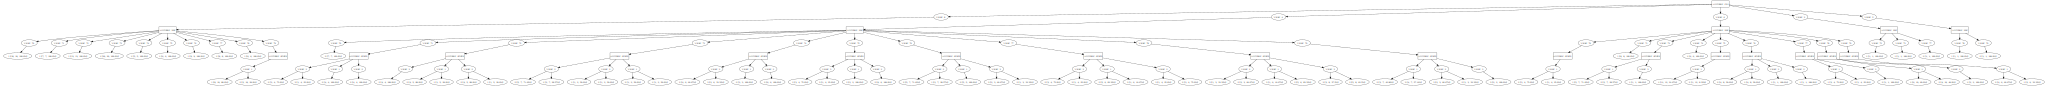

In [15]:
auto_tree = draw_tree(tree, 'auto_tree.dot', display=False)
auto_tree

#### 3.1.7 Clean up using `resolve_attribute_values()`

In [16]:
tree = resolve_attribute_values(tree, auto_copy)
tree

start
label origin
val [LeafNode(label=1, count=8, total=10)]
summarized {1: 8}
total 8
start
label origin
val [LeafNode(label=2, count=3, total=4)]
summarized {2: 3}
total 3
start
label origin
val [LeafNode(label=1, count=5, total=7)]
summarized {1: 6}
total 6
label origin
val [LeafNode(label=1, count=1, total=1)]
summarized {1: 7}
total 7
start
label origin
val [LeafNode(label=1, count=11, total=12)]
summarized {1: 11}
total 11
start
label origin
val [LeafNode(label=1, count=3, total=4)]
summarized {1: 3, 2: 1}
total 4
label origin
val [LeafNode(label=2, count=1, total=1)]
summarized {1: 3, 2: 1}
total 4
start
label origin
val [LeafNode(label=1, count=6, total=10)]
summarized {1: 8}
total 8
label origin
val [LeafNode(label=1, count=2, total=2)]
summarized {1: 10}
total 10
start
label origin
val [LeafNode(label=2, count=4, total=6)]
summarized {2: 4}
total 4
start
label year
val [LeafNode(label=2, count=3, total=3)]
summarized {1: 61, 2: 12}
total 73
label year
val [LeafNode(label=1, 

AttributeNode(name='cyls', values={8: AttributeNode(name='year', values={70: [LeafNode(label=1, count=18, total=18)], 71: [LeafNode(label=1, count=7, total=7)], 72: [LeafNode(label=1, count=13, total=13)], 73: [LeafNode(label=1, count=20, total=20)], 74: [LeafNode(label=1, count=5, total=5)], 75: [LeafNode(label=1, count=6, total=6)], 76: [LeafNode(label=1, count=9, total=9)], 77: [LeafNode(label=1, count=8, total=8)], 78: [LeafNode(label=1, count=6, total=6)], 79: [LeafNode(label=1, count=8, total=8)]}), 4: AttributeNode(name='year', values={70: [LeafNode(label=2, count=7, total=7)], 71: AttributeNode(name='origin', values={3: [LeafNode(label=2, count=3, total=4)], 1: [LeafNode(label=2, count=4, total=4)], 2: [LeafNode(label=2, count=4, total=4)]}), 72: AttributeNode(name='origin', values={3: [LeafNode(label=2, count=4, total=4)], 1: [LeafNode(label=2, count=4, total=5)], 2: [LeafNode(label=2, count=4, total=5)]}), 73: AttributeNode(name='origin', values={2: [LeafNode(label=2, count=5

#### 3.1.8 Clean up using `resolve_leaf_nodes()`

In [17]:
tree = resolve_leaf_nodes(tree)
tree

AttributeNode(name='cyls', values={8: AttributeNode(name='year', values={70: [LeafNode(label=1, count=18, total=18)], 71: [LeafNode(label=1, count=7, total=7)], 72: [LeafNode(label=1, count=13, total=13)], 73: [LeafNode(label=1, count=20, total=20)], 74: [LeafNode(label=1, count=5, total=5)], 75: [LeafNode(label=1, count=6, total=6)], 76: [LeafNode(label=1, count=9, total=9)], 77: [LeafNode(label=1, count=8, total=8)], 78: [LeafNode(label=1, count=6, total=6)], 79: [LeafNode(label=1, count=8, total=8)]}), 4: AttributeNode(name='year', values={70: [LeafNode(label=2, count=7, total=7)], 71: AttributeNode(name='origin', values={3: [LeafNode(label=2, count=3, total=4)], 1: [LeafNode(label=2, count=4, total=4)], 2: [LeafNode(label=2, count=4, total=4)]}), 72: AttributeNode(name='origin', values={3: [LeafNode(label=2, count=4, total=4)], 1: [LeafNode(label=2, count=4, total=5)], 2: [LeafNode(label=2, count=4, total=5)]}), 73: AttributeNode(name='origin', values={2: [LeafNode(label=2, count=5

#### 3.1.9 Draw the cleaned decision tree

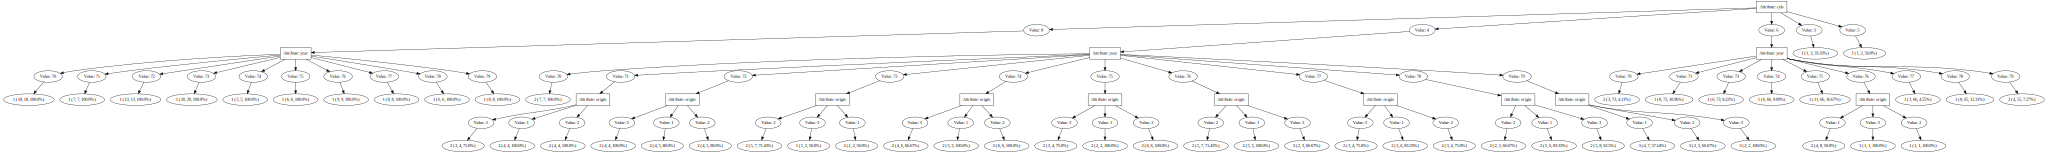

In [18]:
cleaned_auto_tree = draw_tree(tree, 'cleaned_auto_tree.dot', display=False)
cleaned_auto_tree

#### 3.1.20 Observations
* The rule formulated is as follow:
    * First, it looks at the `cyls` attribute
    * Then, it looks at the `year` attribute
    * Finally, it looks at the `origin` attribute
* The `cyls` attribute has the least amount of nodes, while `origin` has the most amount of nodes.
* Not every `origin` attribute has a `year` attribute as it has been resolved in earlier steps.
    

### 3.2 Experimentation with Auto MPG Data Classification

*TODO: Use stratified k-fold cross validation (i.e., your tdidt_stratified() function) to predict mpg labels using 10 folds. Display the resulting confusion matrix. In addition, compute accuracy, precision, recall, and the f-measure over the resulting confusion matrix and display each. Compare your results to the results you obtained using knn and naive bayes in HW-6* 

#### 3.2.1 Create stratified k-fold cross validation

* With k=10
* Only use `cyls`, `year`, and `origin` attributes as they are the only attributes that are categorical.

In [19]:
cmatrix_auto = tdidt_stratified(auto_copy, 10, 'mpg', ['cyls','year','origin'])
cmatrix_auto

available columns:  ['cyls', 'year', 'origin']
entropy:  {0.6861371704937099: ['cyls'], 1.1763845064746887: ['year'], 1.0263708850267097: ['origin']}
lowest_entropy 0.6861371704937099
available columns:  ['year', 'origin']
entropy:  {0.07475913650627808: ['year'], 0.15109697051711368: ['origin']}
lowest_entropy 0.07475913650627808
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
entropy:  {0.7642045065086203: ['origin']}
lowest_entropy 0.7642045065086203
available columns:  []
return 3
done looping
return 4
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
available columns:  ['origin']
return 2
done looping
return 4
available columns:  ['year', 'origin']
entropy:  {0.6478657997349355: ['year'], 0.862819963445168: ['origin']}
lowest_entro

actual      1    2    3    total
--------  ---  ---  ---  -------
1         153    9    0      162
2          26   92    5      123
3           0   18    4       22
total     179  119    9      307

#### 3.2.2 Evaluate classification performance

In [20]:
label_list = cmatrix_auto.get_column_data('actual')
if 'total' in label_list:
    label_list.remove('total')

# Find non-empty labels
sum_of_actual_labels = cmatrix_auto.get_column_data('total')
non_empty_label = 0
for i in sum_of_actual_labels:
    if i != 0:
        non_empty_label += 1

if cmatrix_auto[cmatrix_auto.row_count() - 1]['actual'] == 'total':
    non_empty_label -= 1

print("Non-empty labels count:", non_empty_label)

# Accuracy
total_accuracy = 0
for i in label_list: 
    num = accuracy(cmatrix_auto, i)
    if num != -1:
        total_accuracy += num
acc = total_accuracy / non_empty_label
print("Average accuracy:", acc)

# Precision
total_precision = 0
denum = non_empty_label
for i in label_list:
    num = precision(cmatrix_auto, i)
    if num != -1:
        total_precision += num
    else:
        print("p_prediced is 0 for label", i, ". Subtracted 1 from non_empty_label.")
        non_empty_label -= 1
precision_m = total_precision / denum
print("Precision:", precision_m)

# Recall
total_recall = 0
denum = non_empty_label
for i in label_list: # labels are 1, 2, 3
    num = recall(cmatrix_auto, i)
    if num != -1:
        total_recall += num
    else:
        print("p_actual is 0 for label", i, ". Subtracted 1 from non_empty_label.")
        denum -= 1
recall_m = total_recall / non_empty_label
print("Recall:", recall_m)

# F-score
f_score = 2 * precision_m * recall_m / (precision_m + recall_m)
print("Macro-averaging F-score:", f_score)

Non-empty labels count: 3
Average accuracy: 0.8740499457111834
Precision: 0.6907674304979595
Recall: 0.6247433686458076
Macro-averaging F-score: 0.6560985615032435


#### 3.2.3 Compare to KNN and Naive Bayes classification performance

* kNN result:

    |actual|1|2|3|total|
    |---|---|---|---|---|
    |1|149|13|0|162|
    |2|23|97|3|123|
    |3|0|20|2|22|
    |total|172|130|5|307|

    Non-empty labels count: 3

    Average accuracy: 0.8718783930510314

    Precision: 0.6708109719737627

    Recall: 0.5997600211692352

    Macro-averaging F-score: 0.6332988946273842

* Naive Bayes Result

    |actual|1|2|3|total|
    |---|---|---|---|---|
    |1|145|9|8|162|
    |2|12|12|99|123|
    |3|0|1|21|22|
    |total|157|22|128|307|

    Non-empty labels count: 3

    Average accuracy: 0.7198697068403909

    Precision: 0.5443613081451457

    Recall: 0.6490560528500908

    Macro-averaging F-score: 0.5921164104640683

* Comparison
    * Comparing with the kNN and Naive Bayes results, the decision tree has the lowest accuracy, precision, recall, and f-score.
    * kNN is the highest in terms of accuracy, precision, and f-score, while Naive Bayes is the highest in terms of recall.
    * The low performance of the decision tree is due to the fact that the decision tree is not designed to handle continuous values. This is a big disadvantage as the auto data has a lot of continuous values.
    * A side note is that all classifiers are run with the same data set, with the `mpg` attribute discretized into 3 bins. 

## 4. Titanic Data Analysis

### 4.1 Data Loading
Load the titanic data set below. The attributes are *class*, *age*, *gender*, and *survival*.

In [21]:
titanic = DataTable(['class', 'age', 'gender', 'survival'])
titanic.load('titanic.txt')
titanic.rows(range(10))

class    age    gender    survival
-------  -----  --------  ----------
crew     adult  female    yes
first    adult  male      no
first    adult  male      no
third    adult  female    no
second   adult  female    yes
third    adult  female    yes
second   adult  male      yes
second   adult  female    yes
crew     child  female    no
third    adult  female    no

### 4.2 Building a Decision Tree

Since all data are categorical, no further cleaning is necessary.

#### 4.2.1 Building the initial decision tree

In [22]:
titanic_tree = tdidt(titanic, 'survival', ['class', 'age', 'gender'])
titanic_tree

available columns:  ['class', 'age', 'gender']
entropy:  {0.8483634692722224: ['class'], 0.9012406875470709: ['age'], 0.7652602113304224: ['gender']}
lowest_entropy 0.7652602113304224
available columns:  ['class', 'age']
entropy:  {0.7334350137077876: ['class'], 0.7372563536552104: ['age']}
lowest_entropy 0.7334350137077876
available columns:  ['age']
entropy:  {0.8851962996587222: ['age']}
lowest_entropy 0.8851962996587222
available columns:  []
return 3
available columns:  []
return 2
done looping
return 4
available columns:  ['age']
entropy:  {0.7651352640546407: ['age']}
lowest_entropy 0.7651352640546407
available columns:  []
return 3
done looping
return 4
available columns:  ['age']
entropy:  {0.6589584271075456: ['age']}
lowest_entropy 0.6589584271075456
available columns:  []
return 3
available columns:  []
return 3
done looping
return 4
available columns:  ['age']
entropy:  {0.38838676453078474: ['age']}
lowest_entropy 0.38838676453078474
available columns:  []
return 3
availa

AttributeNode(name='gender', values={'female': AttributeNode(name='class', values={'crew': AttributeNode(name='age', values={'adult': [LeafNode(label='yes', count=118, total=175), LeafNode(label='no', count=57, total=175)], 'child': [LeafNode(label='no', count=5, total=5)]}), 'third': AttributeNode(name='age', values={'adult': [LeafNode(label='no', count=192, total=862), LeafNode(label='yes', count=670, total=862)]}), 'second': AttributeNode(name='age', values={'adult': [LeafNode(label='yes', count=387, total=462), LeafNode(label='no', count=75, total=462)], 'child': [LeafNode(label='yes', count=35, total=48), LeafNode(label='no', count=13, total=48)]}), 'first': AttributeNode(name='age', values={'adult': [LeafNode(label='yes', count=154, total=168), LeafNode(label='no', count=14, total=168)], 'child': [LeafNode(label='no', count=11, total=11)]})}), 'male': AttributeNode(name='class', values={'first': AttributeNode(name='age', values={'adult': [LeafNode(label='no', count=80, total=93),

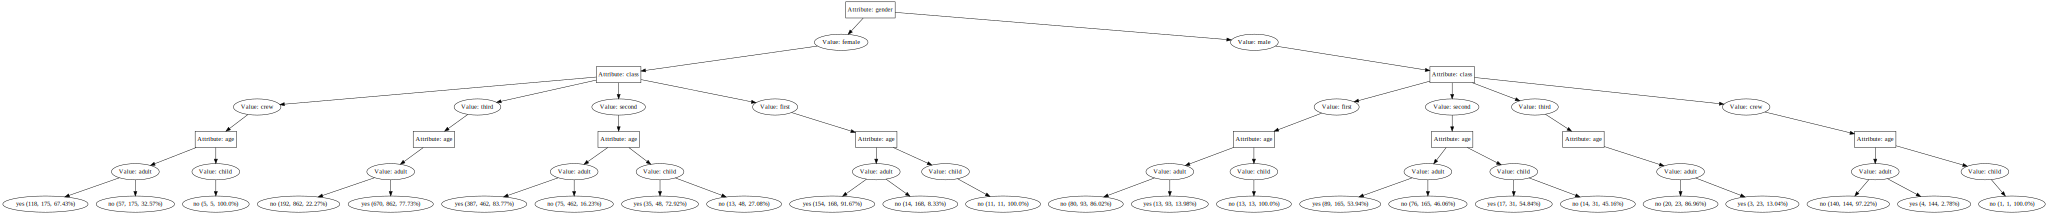

In [23]:
titanic_tree_diagram = draw_tree(titanic_tree, 'titanic_tree.dot', display=False)
titanic_tree_diagram

#### 4.2.2 Clean up using `resolve_attribute_values()`

In [24]:
titanic_tree = resolve_attribute_values(titanic_tree, titanic)
titanic_tree

start
label age
val [LeafNode(label='yes', count=670, total=862)]
summarized {'yes': 670}
total 670
start
label age
val [LeafNode(label='no', count=20, total=23)]
summarized {'no': 20}
total 20


AttributeNode(name='gender', values={'female': AttributeNode(name='class', values={'crew': AttributeNode(name='age', values={'adult': [LeafNode(label='yes', count=118, total=175)], 'child': [LeafNode(label='no', count=5, total=5)]}), 'third': [LeafNode(label='yes', count=670, total=670)], 'second': AttributeNode(name='age', values={'adult': [LeafNode(label='yes', count=387, total=462)], 'child': [LeafNode(label='yes', count=35, total=48)]}), 'first': AttributeNode(name='age', values={'adult': [LeafNode(label='yes', count=154, total=168)], 'child': [LeafNode(label='no', count=11, total=11)]})}), 'male': AttributeNode(name='class', values={'first': AttributeNode(name='age', values={'adult': [LeafNode(label='no', count=80, total=93)], 'child': [LeafNode(label='no', count=13, total=13)]}), 'second': AttributeNode(name='age', values={'adult': [LeafNode(label='yes', count=89, total=165)], 'child': [LeafNode(label='yes', count=17, total=31)]}), 'third': [LeafNode(label='no', count=20, total=2

#### 4.2.3 Clean up using `resolve_leaf_nodes()`

In [25]:
titanic_tree = resolve_leaf_nodes(titanic_tree)
titanic_tree

AttributeNode(name='gender', values={'female': AttributeNode(name='class', values={'crew': AttributeNode(name='age', values={'adult': [LeafNode(label='yes', count=118, total=175)], 'child': [LeafNode(label='no', count=5, total=5)]}), 'third': [LeafNode(label='yes', count=670, total=670)], 'second': AttributeNode(name='age', values={'adult': [LeafNode(label='yes', count=387, total=462)], 'child': [LeafNode(label='yes', count=35, total=48)]}), 'first': AttributeNode(name='age', values={'adult': [LeafNode(label='yes', count=154, total=168)], 'child': [LeafNode(label='no', count=11, total=11)]})}), 'male': AttributeNode(name='class', values={'first': AttributeNode(name='age', values={'adult': [LeafNode(label='no', count=80, total=93)], 'child': [LeafNode(label='no', count=13, total=13)]}), 'second': AttributeNode(name='age', values={'adult': [LeafNode(label='yes', count=89, total=165)], 'child': [LeafNode(label='yes', count=17, total=31)]}), 'third': [LeafNode(label='no', count=20, total=2

#### 4.2.4 Draw the cleaned decision tree

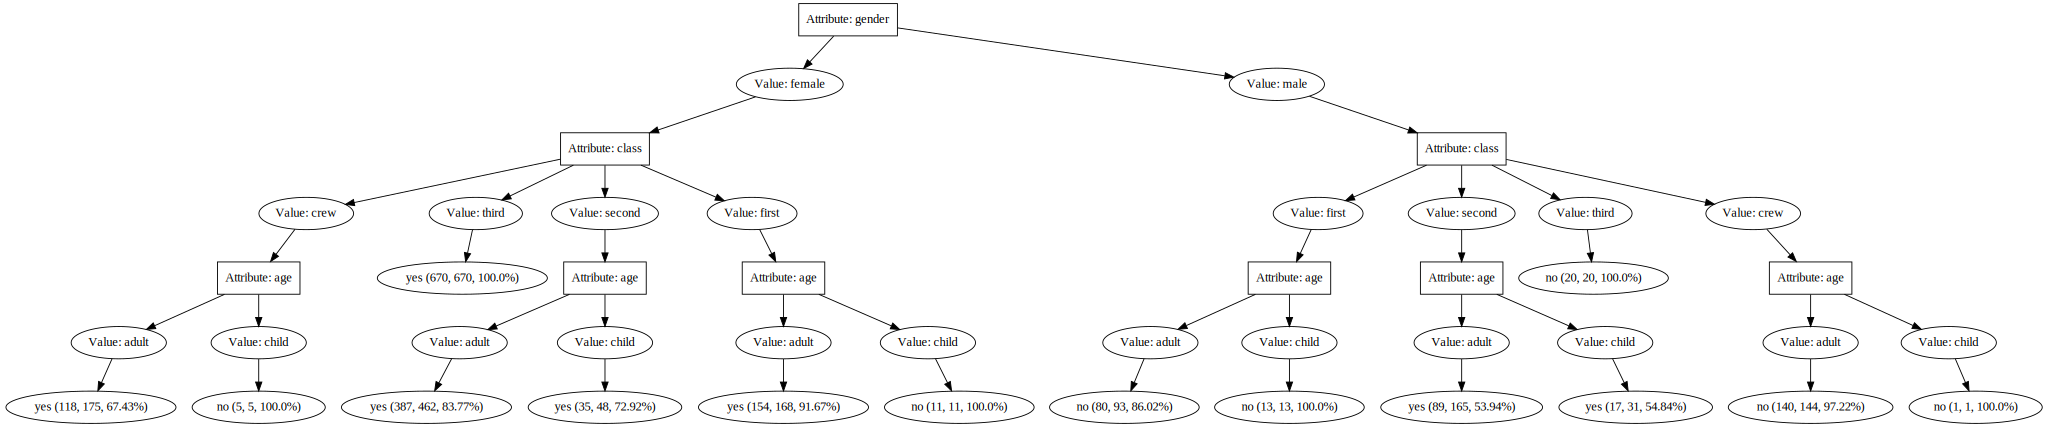

In [26]:
cleaned_titanic_tree = draw_tree(titanic_tree, 'cleaned_titanic_tree.dot', display=False)
cleaned_titanic_tree

#### 4.2.5 Observations
* The rule formulated is as follow:
    * First, it looks at the `gender` attribute
    * Then, it looks at the `class` attribute
    * Finally, it looks at the `age` attribute
* The `gender` attribute has the least amount of nodes, while `class` has the most amount of nodes.
* After cleaning up, the decision tree looks more simple and easier to understand.
* There is also a higher survival chance for female over male.

### 4.3 Result comparison with KNN and Naive Bayes

#### 4.3.1 Create stratified k-fold cross validation

In [27]:
cmatrix_titanic = tdidt_stratified(titanic, 10, 'survival', ['class', 'age', 'gender'])
cmatrix_titanic

available columns:  ['class', 'age', 'gender']
entropy:  {0.8390745470881351: ['class'], 0.9024850415434428: ['age'], 0.7674007891675809: ['gender']}
lowest_entropy 0.7674007891675809
available columns:  ['class', 'age']
entropy:  {0.605456809950376: ['class'], 0.8358594470150886: ['age']}
lowest_entropy 0.605456809950376
available columns:  ['age']
entropy:  {0.527097986100076: ['age']}
lowest_entropy 0.527097986100076
available columns:  []
return 3
available columns:  []
return 2
done looping
return 4
available columns:  ['age']
entropy:  {0.9885016154106419: ['age']}
lowest_entropy 0.9885016154106419
available columns:  []
return 3
available columns:  []
return 3
done looping
return 4
available columns:  ['age']
entropy:  {0.1526117231204622: ['age']}
lowest_entropy 0.1526117231204622
available columns:  []
return 3
available columns:  []
return 2
done looping
return 4
available columns:  ['age']
entropy:  {0.6098403047164004: ['age']}
lowest_entropy 0.6098403047164004
available co

actual      no    yes    total
--------  ----  -----  -------
no         269    442      711
yes         27   1463     1490
total      296   1905     2201

#### 4.3.2 Evaluate classification performance

* For Decision Tree

In [28]:
label_list = cmatrix_titanic.get_column_data('actual')
if 'total' in label_list:
    label_list.remove('total')

# Find non-empty labels
sum_of_actual_labels = cmatrix_titanic.get_column_data('total')
non_empty_label = 0
for i in sum_of_actual_labels:
    if i != 0:
        non_empty_label += 1

if cmatrix_titanic[cmatrix_titanic.row_count() - 1]['actual'] == 'total':
    non_empty_label -= 1

print("Non-empty labels count:", non_empty_label)

# Accuracy
total_accuracy = 0
for i in label_list: 
    num = accuracy(cmatrix_titanic, i)
    if num != -1:
        total_accuracy += num
acc = total_accuracy / non_empty_label
print("Average accuracy:", acc)

# Precision
total_precision = 0
denum = non_empty_label
for i in label_list:
    num = precision(cmatrix_titanic, i)
    if num != -1:
        total_precision += num
    else:
        print("p_prediced is 0 for label", i, ". Subtracted 1 from non_empty_label.")
        non_empty_label -= 1
precision_m = total_precision / denum
print("Precision:", precision_m)

# Recall
total_recall = 0
denum = non_empty_label
for i in label_list: # labels are 1, 2, 3
    num = recall(cmatrix_titanic, i)
    if num != -1:
        total_recall += num
    else:
        print("p_actual is 0 for label", i, ". Subtracted 1 from non_empty_label.")
        denum -= 1
recall_m = total_recall / non_empty_label
print("Recall:", recall_m)

# F-score
f_score = 2 * precision_m * recall_m / (precision_m + recall_m)
print("Macro-averaging F-score:", f_score)

Non-empty labels count: 2
Average accuracy: 0.7869150386188096
Precision: 0.8383813932042279
Recall: 0.6801097801565051
Macro-averaging F-score: 0.7509972991907239


* For kNN

    |actual|no|yes|total|
    |---|---|---|---|
    |no|0|711|711|
    |yes|0|1490|1490|
    |total|0|2201|2201|


    Non-empty labels count: 2

    Average accuracy: 0.6769650159018628

    p_prediced is 0 for label no. Subtracted 1 from non_empty_label.

    Precision: 0.3384825079509314

    Recall: 1.0

    Macro-averaging F-score: 0.5057705363204344

* For Naive Bayes

    |actual|no|yes|total|
    |---|---|---|---|
    |no|349|362|711|
    |yes|126|1364|1490|
    |total|475|1726|2201|

    Non-empty labels count: 2

    Average accuracy: 0.7782825988187188

    Precision: 0.7625016771360615

    Recall: 0.7031470940824437
    
    Macro-averaging F-score: 0.7316225401880811

#### 4.3.3 Comparison

* Comparing with the kNN and Naive Bayes results, the decision tree has the lowest accuracy, precision, recall, and f-score.
* Naive Bayes is the highest in terms of accuracy, precision, and f-score, while kNN is the highest in terms of recall.
* Again, the low performance of the decision tree is due to the fact that the decision tree is not designed to handle continuous values. This is a big disadvantage as this data also has a lot of continuous values.

## 5. Student Stress Data Analysis

#### 5.1 Load student stress data

Load the student stress data set below. The attributes are given below in column order, where the short name to use is given in parenthesis: 
1. sleep_quality (sleep)
2. living_conditions (living)
3. basic_needs (basics)
4. academic_performance (academic)
5. study_load (study)
6. future_career_concerns (career)
7. social_support (social)
8. extracurricular_activities (extra)
9. stress_level (stress)

In [29]:
stress = DataTable(['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra', 'stress'])
stress.load('student-stress.txt')
stress.rows(range(10))

  sleep    living    basics    academic    study    career    social    extra    stress
-------  --------  --------  ----------  -------  --------  --------  -------  --------
      2         3         2           3        2         3         2        3         1
      1         1         2           1        4         5         1        5         2
      2         2         2           2        3         2         2        2         1
      1         2         2           2        4         4         1        4         2
      5         2         3           4        3         2         1        0         1
      1         2         1           2        5         5         1        4         2
      4         4         4           5        1         1         3        2         0
      1         1         1           1        3         4         1        4         2
      2         3         3           3        3         3         3        2         1
      1         5         2     

Since all data is in categorical form, no further cleaning is necessary.

### 5.2 Building a Decision Tree

### 5.2.1 Building the initial decision tree

In [30]:
stress_tree = tdidt(stress, 'stress', ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra'])
stress_tree

available columns:  ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra']
entropy:  {0.6013505852783496: ['sleep'], 1.0024151487896114: ['living'], 0.8337002201022756: ['basics'], 0.8213846411881403: ['academic'], 1.0156728398233903: ['study'], 0.6018833489579376: ['career'], 0.8157214964880944: ['social'], 0.8223984442948133: ['extra']}
lowest_entropy 0.6013505852783496
available columns:  ['living', 'basics', 'academic', 'study', 'career', 'social', 'extra']
entropy:  {0.36776058963870695: ['living'], 0.36496798394419994: ['basics'], 0.37031702696569135: ['academic'], 0.32463678026037723: ['study'], 0.2598446691066176: ['career'], 0.17916848082757328: ['social'], 0.33043354895257687: ['extra']}
lowest_entropy 0.17916848082757328
available columns:  ['living', 'basics', 'academic', 'study', 'career', 'extra']
return 2
available columns:  ['living', 'basics', 'academic', 'study', 'career', 'extra']
return 2
available columns:  ['living', 'basics', 'academic', 

AttributeNode(name='sleep', values={2: AttributeNode(name='social', values={2: [LeafNode(label=1, count=82, total=82)], 3: [LeafNode(label=1, count=81, total=81)], 1: AttributeNode(name='career', values={0: AttributeNode(name='basics', values={3: [LeafNode(label=2, count=1, total=1)], 5: [LeafNode(label=2, count=1, total=1)], 0: [LeafNode(label=1, count=1, total=1)]}), 3: [LeafNode(label=1, count=1, total=1)], 5: AttributeNode(name='basics', values={4: [LeafNode(label=0, count=1, total=1)], 0: [LeafNode(label=0, count=1, total=1)], 5: [LeafNode(label=2, count=1, total=1)]}), 2: [LeafNode(label=0, count=4, total=4)], 1: AttributeNode(name='living', values={4: [LeafNode(label=0, count=1, total=1)], 2: [LeafNode(label=2, count=1, total=1)]}), 4: [LeafNode(label=0, count=2, total=2)]}), 0: AttributeNode(name='basics', values={4: [LeafNode(label=1, count=1, total=1)], 0: AttributeNode(name='living', values={3: [LeafNode(label=0, count=1, total=1)], 0: [LeafNode(label=1, count=1, total=1)], 

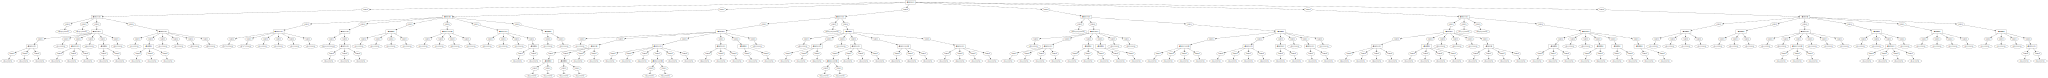

In [31]:
stress_tree_diagram = draw_tree(stress_tree, 'stress_tree.dot', display=False)
stress_tree_diagram

#### 5.2.2 Clean up using `resolve_attribute_values()`

In [32]:
stress_tree = resolve_attribute_values(stress_tree, stress)
stress_tree

start
label basics
val [LeafNode(label=2, count=1, total=1)]
summarized {2: 2, 1: 1}
total 3
label basics
val [LeafNode(label=2, count=1, total=1)]
summarized {2: 2, 1: 1}
total 3
label basics
val [LeafNode(label=1, count=1, total=1)]
summarized {2: 2, 1: 1}
total 3
start
label basics
val [LeafNode(label=0, count=1, total=1)]
summarized {0: 2, 2: 1}
total 3
label basics
val [LeafNode(label=0, count=1, total=1)]
summarized {0: 2, 2: 1}
total 3
label basics
val [LeafNode(label=2, count=1, total=1)]
summarized {0: 2, 2: 1}
total 3
start
label living
val [LeafNode(label=0, count=1, total=1)]
summarized {0: 1, 2: 1}
total 2
label living
val [LeafNode(label=2, count=1, total=1)]
summarized {0: 1, 2: 1}
total 2
start
label living
val [LeafNode(label=0, count=1, total=1)]
summarized {0: 2, 1: 1}
total 3
label living
val [LeafNode(label=1, count=1, total=1)]
summarized {0: 2, 1: 1}
total 3
label living
val [LeafNode(label=0, count=1, total=1)]
summarized {0: 2, 1: 1}
total 3
start
label basics


AttributeNode(name='sleep', values={2: AttributeNode(name='social', values={2: [LeafNode(label=1, count=82, total=82)], 3: [LeafNode(label=1, count=81, total=81)], 1: AttributeNode(name='career', values={0: [LeafNode(label=2, count=1, total=3), LeafNode(label=1, count=1, total=3)], 3: [LeafNode(label=1, count=1, total=1)], 5: [LeafNode(label=0, count=1, total=3), LeafNode(label=2, count=1, total=3)], 2: [LeafNode(label=0, count=4, total=4)], 1: [LeafNode(label=0, count=1, total=2), LeafNode(label=2, count=1, total=2)], 4: [LeafNode(label=0, count=2, total=2)]}), 0: AttributeNode(name='basics', values={4: [LeafNode(label=1, count=1, total=1)], 0: [LeafNode(label=0, count=1, total=3), LeafNode(label=1, count=1, total=3)], 3: [LeafNode(label=1, count=1, total=1)], 2: [LeafNode(label=2, count=1, total=1)], 5: [LeafNode(label=1, count=2, total=2)], 1: [LeafNode(label=0, count=2, total=2)]})}), 1: AttributeNode(name='extra', values={5: AttributeNode(name='basics', values={2: [LeafNode(label=

#### 5.2.3 Clean up using `resolve_leaf_nodes()`

In [33]:
stress_tree = resolve_leaf_nodes(stress_tree)
stress_tree

AttributeNode(name='sleep', values={2: AttributeNode(name='social', values={2: [LeafNode(label=1, count=82, total=82)], 3: [LeafNode(label=1, count=81, total=81)], 1: AttributeNode(name='career', values={0: [LeafNode(label=2, count=1, total=3)], 3: [LeafNode(label=1, count=1, total=1)], 5: [LeafNode(label=0, count=1, total=3)], 2: [LeafNode(label=0, count=4, total=4)], 1: [LeafNode(label=0, count=1, total=2)], 4: [LeafNode(label=0, count=2, total=2)]}), 0: AttributeNode(name='basics', values={4: [LeafNode(label=1, count=1, total=1)], 0: [LeafNode(label=0, count=1, total=3)], 3: [LeafNode(label=1, count=1, total=1)], 2: [LeafNode(label=2, count=1, total=1)], 5: [LeafNode(label=1, count=2, total=2)], 1: [LeafNode(label=0, count=2, total=2)]})}), 1: AttributeNode(name='extra', values={5: AttributeNode(name='basics', values={2: [LeafNode(label=2, count=76, total=76)], 1: [LeafNode(label=2, count=67, total=67)], 0: [LeafNode(label=2, count=1, total=1)], 4: [LeafNode(label=2, count=1, total=

#### 5.2.4 Draw the cleaned decision tree

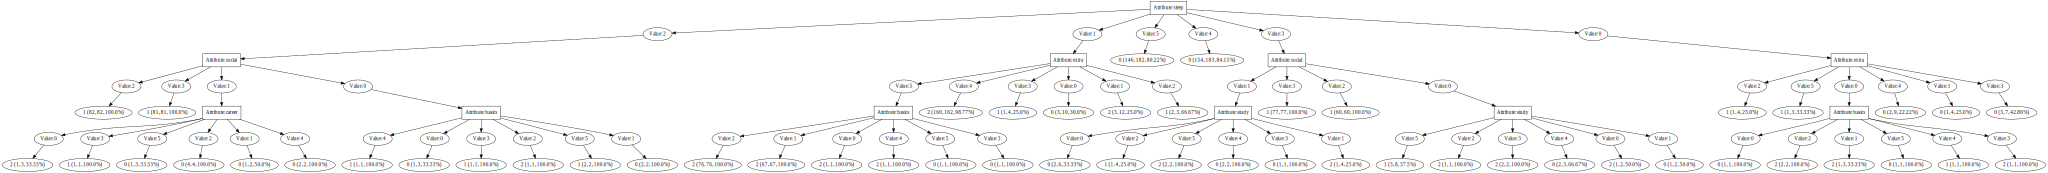

In [34]:
stress_tree_diagram = draw_tree(stress_tree, 'stress_tree.dot', display=False)
stress_tree_diagram

### 5.2.5 Observations

* The rule formulated is as follow:
    * First, it looks at the `sleep` attribute
    * Then, it looks at the `extra` and `social` attributes
    * Finally, it looks at the `career`, `basics`, and `study` attributes
* The `sleep` attribute has the least amount of nodes


### 5.3 Result comparison with KNN and Naive Bayes

#### 5.3.1 Create stratified k-fold cross validation

In [35]:
cmatrix_stress = tdidt_stratified(stress, 10, 'stress', ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra'])
cmatrix_stress

available columns:  ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra']
entropy:  {0.6082128738604204: ['sleep'], 1.0026094977945923: ['living'], 0.8176529498380275: ['basics'], 0.81899402135439: ['academic'], 1.0156362628130886: ['study'], 0.61446719763942: ['career'], 0.8184379276096048: ['social'], 0.8227646699875413: ['extra']}
lowest_entropy 0.6082128738604204
available columns:  ['living', 'basics', 'academic', 'study', 'career', 'social', 'extra']
entropy:  {0.41327857314594185: ['living'], 0.40301452560498396: ['basics'], 0.4594122810681255: ['academic'], 0.4460944760792056: ['study'], 0.3198031821140196: ['career'], 0.25554076735443293: ['social'], 0.4310069056478971: ['extra']}
lowest_entropy 0.25554076735443293
available columns:  ['living', 'basics', 'academic', 'study', 'career', 'extra']
return 2
available columns:  ['living', 'basics', 'academic', 'study', 'career', 'extra']
entropy:  {0.7739760316291208: ['living'], 0.9509775004326937: ['basi

actual      0    1    2    total
--------  ---  ---  ---  -------
0         341    9   22      372
1          30  314   14      358
2          36   15  314      365
total     407  338  350     1095

In [36]:
list_item = stratify(stress, 'stress', 10)

count = 0
for table in list_item:
    count += table.row_count()

print(count)

1100


#### 5.3.2 Evaluate classification performance

* For Decision Tree

In [37]:
label_list = cmatrix_stress.get_column_data('actual')
if 'total' in label_list:
    label_list.remove('total')

# Find non-empty labels
sum_of_actual_labels = cmatrix_stress.get_column_data('total')
non_empty_label = 0
for i in sum_of_actual_labels:
    if i != 0:
        non_empty_label += 1

if cmatrix_stress[cmatrix_stress.row_count() - 1]['actual'] == 'total':
    non_empty_label -= 1

print("Non-empty labels count:", non_empty_label)

# Accuracy
total_accuracy = 0
for i in label_list: 
    num = accuracy(cmatrix_stress, i)
    if num != -1:
        total_accuracy += num
acc = total_accuracy / non_empty_label
print("Average accuracy:", acc)

# Precision
total_precision = 0
denum = non_empty_label
for i in label_list:
    num = precision(cmatrix_stress, i)
    if num != -1:
        total_precision += num
    else:
        print("p_prediced is 0 for label", i, ". Subtracted 1 from non_empty_label.")
        non_empty_label -= 1
precision_m = total_precision / denum
print("Precision:", precision_m)

# Recall
total_recall = 0
denum = non_empty_label
for i in label_list: # labels are 1, 2, 3
    num = recall(cmatrix_stress, i)
    if num != -1:
        total_recall += num
    else:
        print("p_actual is 0 for label", i, ". Subtracted 1 from non_empty_label.")
        denum -= 1
recall_m = total_recall / non_empty_label
print("Recall:", recall_m)

# F-score
f_score = 2 * precision_m * recall_m / (precision_m + recall_m)
print("Macro-averaging F-score:", f_score)

Non-empty labels count: 3
Average accuracy: 0.9232876712328766
Precision: 0.8879915926069772
Recall: 0.8846785371121486
Macro-averaging F-score: 0.8863319688699234


#### 5.3.3 Comparison

* For kNN: Running at k_fold = 10 and k = 7

    |actual|0|1|2|total|
    |---|---|---|---|---|
    |0|373|0|0|373|
    |1|126|231|1|358|
    |2|69|0|300|369|
    |total|568|231|301|1100|

    Non-empty labels count: 3

    Average accuracy: 0.8812121212121212

    Precision: 0.8844559605696193

    Recall: 0.8194198422431151

    Macro-averaging F-score: 0.850696702757969


* For Naive Bayes

    |actual|0|1|2|total|
    |---|---|---|---|---|
    |0|322|16|35|373|
    |1|20|314|24|358|
    |2|22|15|332|369|
    |total|364|345|391|1100|

    Non-empty labels count: 3

    Average accuracy: 0.9199999999999999

    Precision: 0.8812883904955516

    Recall: 0.8800315822789683
    
    Macro-averaging F-score: 0.8806595379829616

* Comparison
    * Comparing with the kNN and Naive Bayes results, the decision tree has the lowest accuracy, precision, recall, and f-score.
    * Naive Bayes is the highest in terms of accuracy, recall, and f-score, while kNN is the highest in terms of precision, though the difference is not significant.
    * The low performance of the decision tree higher than the other two data sets, but still not as high as the other two.


## 6. Issues, Challenges, and Observations

### 6.1 Issues and Challenges
* Implementing recursive function was definitely tricky. It took me a while to figure out `resolve_attribute_values()` and `resolve_leaf_nodes()`.

### 6.2 Observations
* Decision tree performance is not as good as kNN and Naive Bayes like I expected.
* I though it was due to the fact that the decision tree is not designed to handle continuous values. This is a big disadvantage as the auto data has a lot of continuous values.
* However, with the titanic dataset, the decision tree still performed poorly even though all data are categorical.
* This makes me think that there might not be enough data for the decision tree to work properly.